In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [ ]:
df=pd.read_csv("Preprocessed_file1")

In [ ]:
logging.basicConfig(
    filename='logging_visualisation_file1.txt',
    level=logging.DEBUG,
    format='%(asctime)s.%(msecs)03d %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
    filemode="a"

)

In [ ]:
logging.info("Visualisation started")

In [25]:
def feature_plot(col,data):
    fig,ax=plt.subplots(1,2,figsize=(30,10))
    df[col].value_counts().plot.bar(ax=ax[0],color=["#FFC0CB","#00008B"])
    ax[0].set_xlabel(col)
    ax[0].set_ylabel("Value_counts per category")
    ax[0].set_title(f"Value_counts per category of {col}")
    ax[1].set_xlabel(col)
    ax[1].set_ylabel("Mean Transaction Revenue per category")
    ax[1].set_title(f"Mean Transaction Revenue per category of {col}")
    df.groupby(col)["totals.transactionRevenue"].sum().sort_values(ascending=False).plot.bar(ax=ax[1],color=["#800000","#00FF00"])

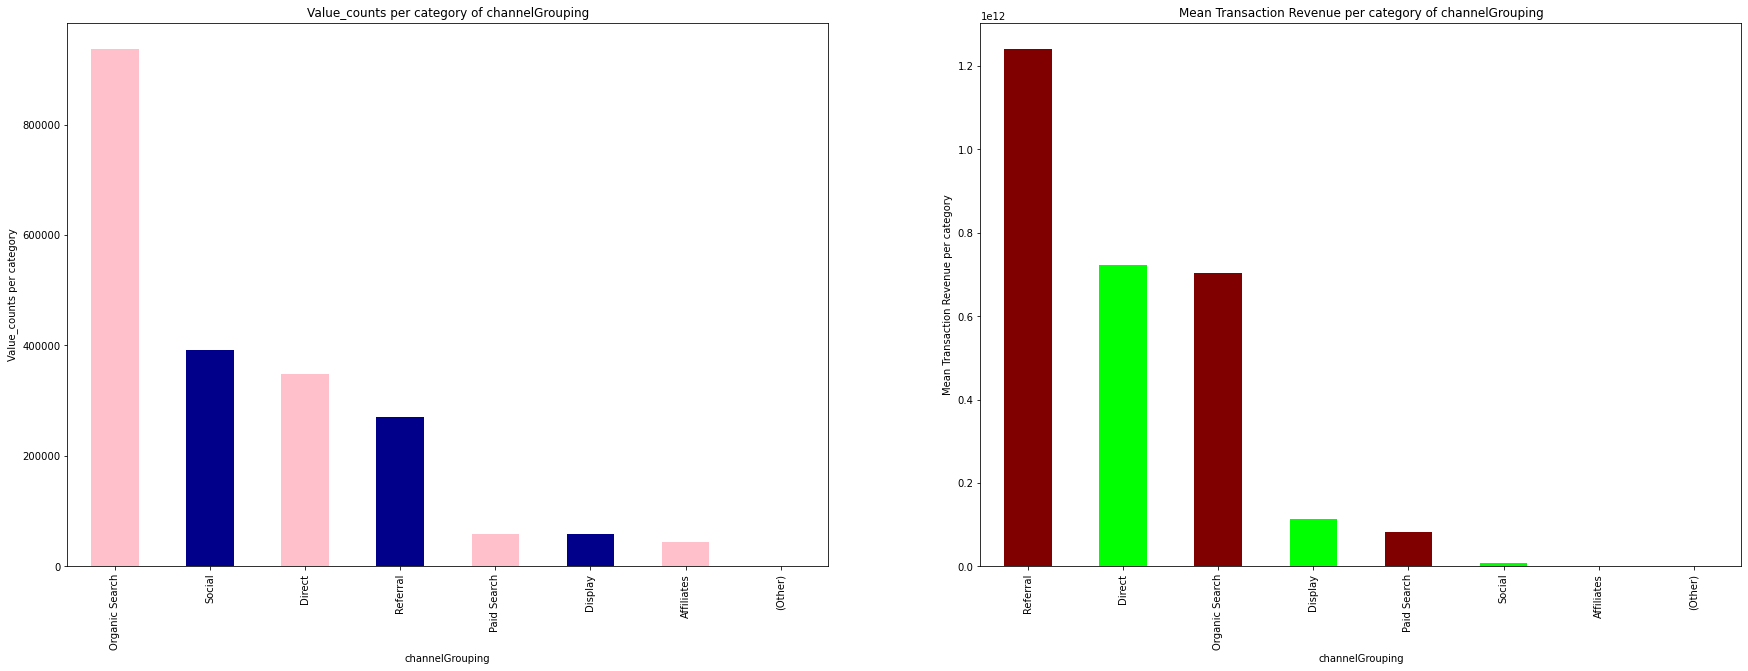

In [45]:
feature_plot("channelGrouping",df)

In [46]:
df["channelGrouping"]=df["channelGrouping"].apply(lambda x: "other" if x=='(Other)' else x)

<AxesSubplot:xlabel='count', ylabel='device.browser'>

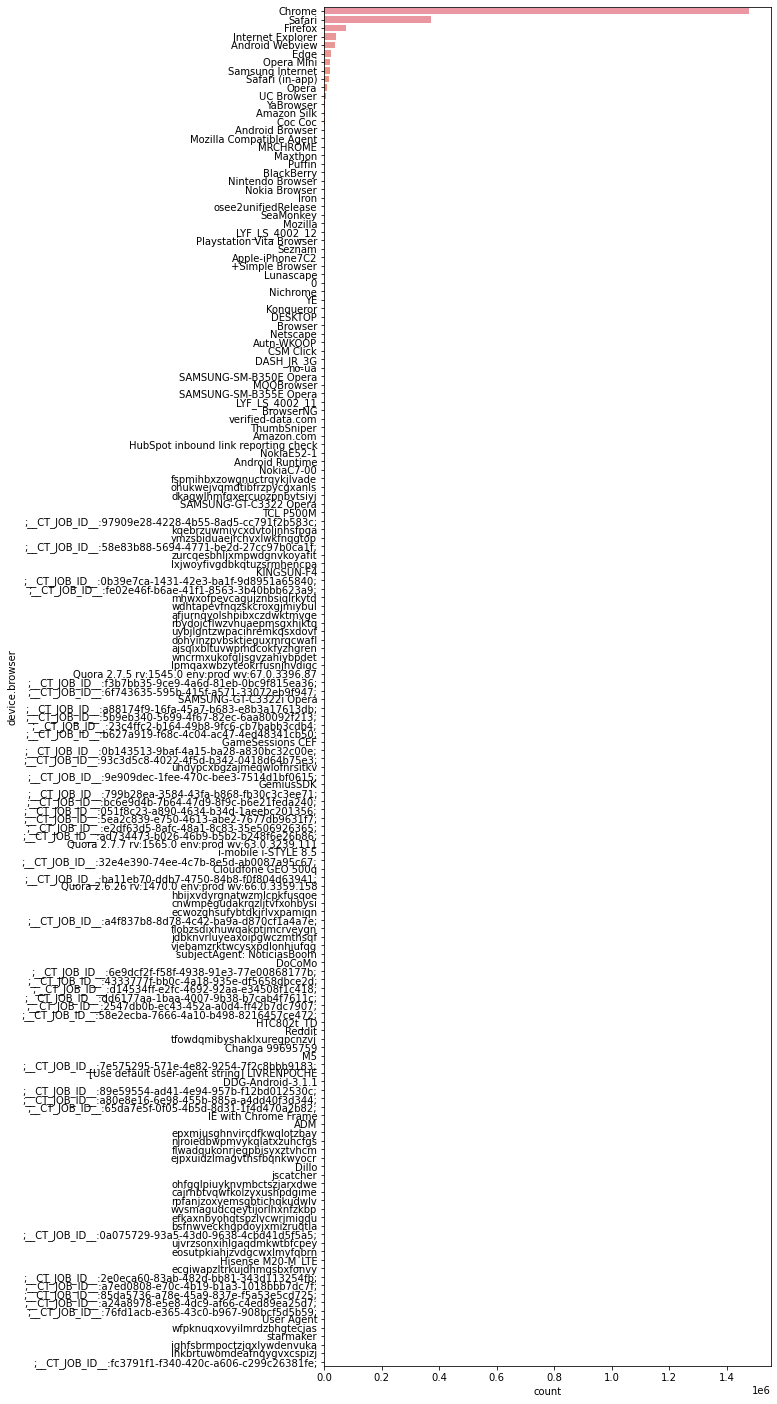

In [48]:
plt.figure(figsize=(8,25))
sns.countplot(data=df,y="device.browser",order=df["device.browser"].value_counts().index,orient="v")

<AxesSubplot:xlabel='device.browser'>

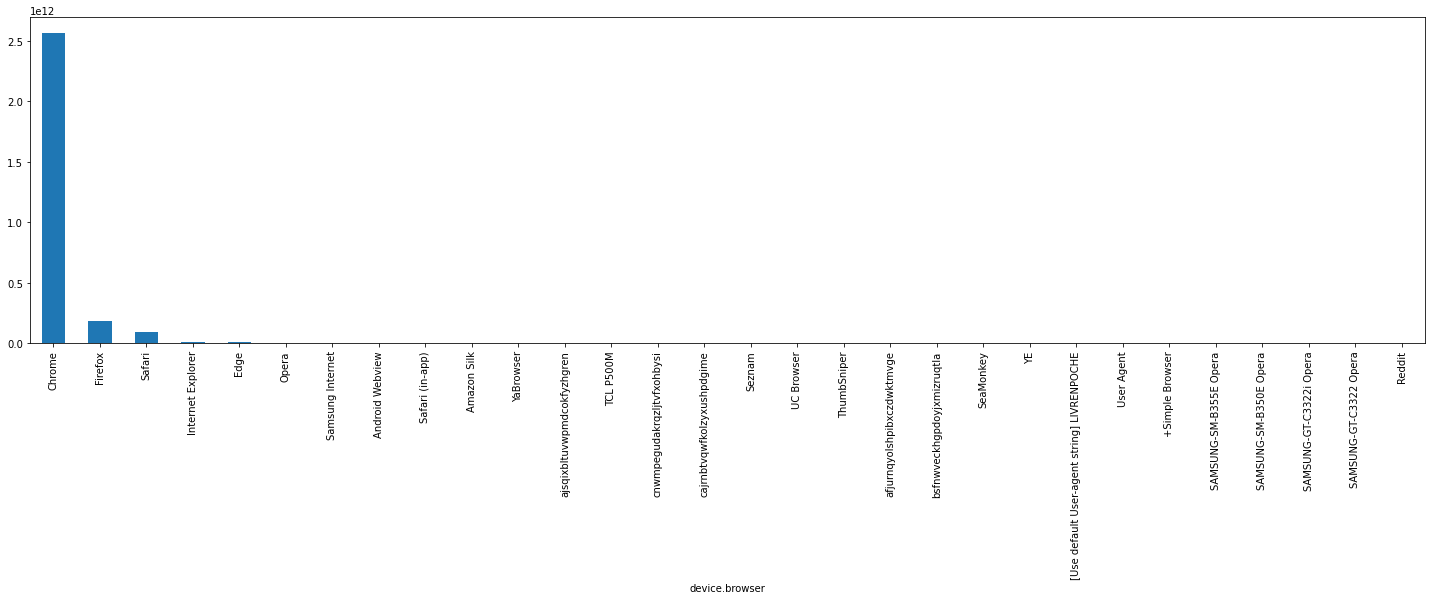

In [50]:
plt.figure(figsize=(25,6))
df.groupby("device.browser")["totals.transactionRevenue"].sum().sort_values(ascending=False)[:30].plot.bar()

### As seen in the graph "device.browse" column has most of transaction in Chrome,Firebox, Safari,Internet_explorer, Edge and value_counts are also maximum in these columns so taking into account all these categorical value and say "others" to rest one.

In [26]:
### The Categorical value of column (device.browser) which has less than 1500 value_counts, lets drop those values

device_browser_transaction_revenue_sum=df.groupby("device.browser")["totals.transactionRevenue"].sum().sort_values(ascending=False)
device_browser_transaction_revenue_sum_equal0=device_browser_transaction_revenue_sum[device_browser_transaction_revenue_sum==0]

In [28]:
def Zero_Revenue_category_separation(x,series):
    if x in series:
        return "other"
    else:
        return x
    
    
df["device.browser"]=df["device.browser"].apply(lambda x:Zero_Revenue_category_separation(x,device_browser_transaction_revenue_sum_equal0))
logging.info("Browser column has been cleaned")

In [30]:
# we do not have transaction record of the rows having null values in "device.browser" column so lets drop all rows having null values in this column.
df=df.dropna(subset=["device.browser"])
logging.info("Null values in Browser column has been dropped")

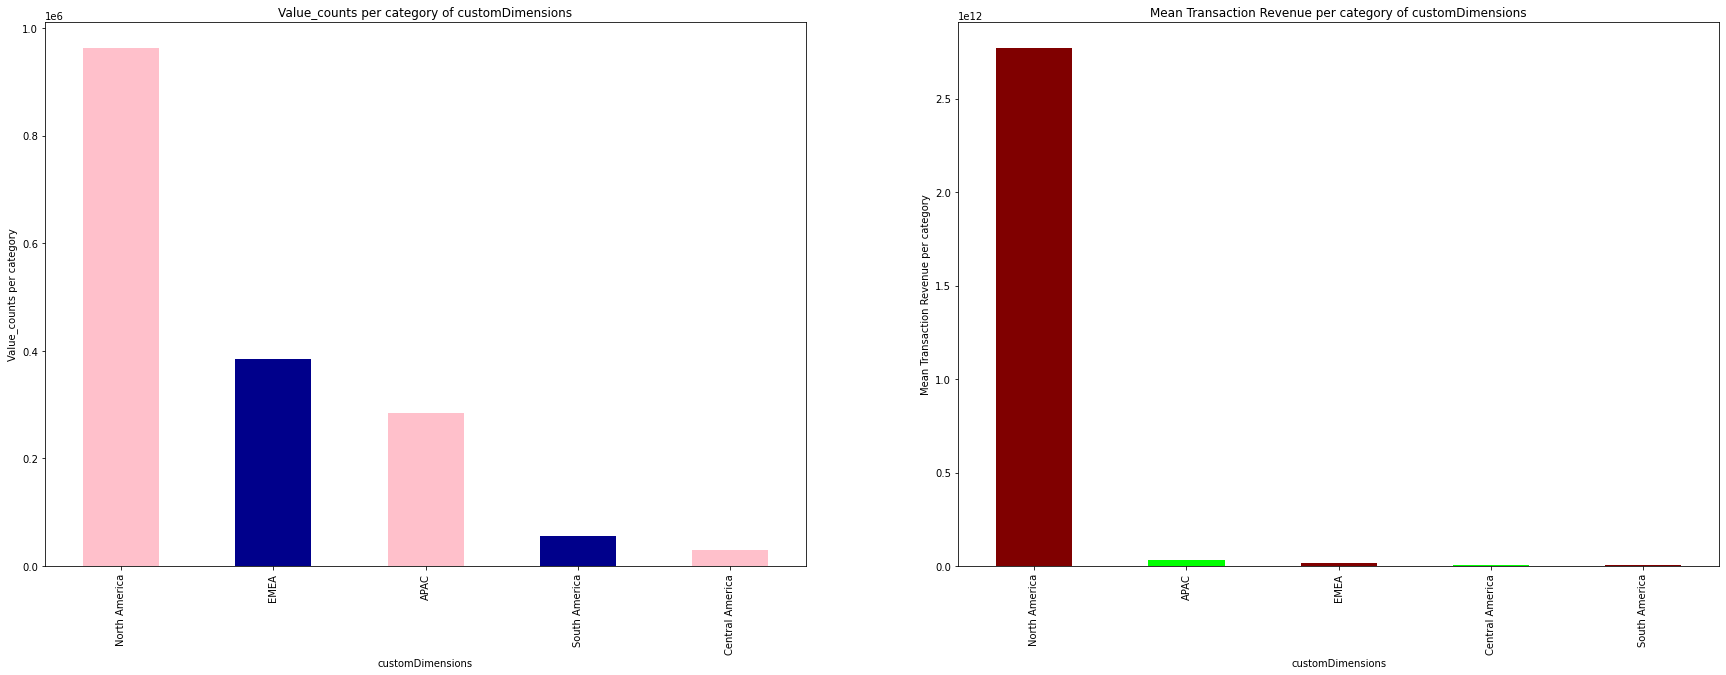

In [60]:
feature_plot("customDimensions",df)

In [34]:
### Let's drop customer dimension as our geographical feature has all the informations.
df=df.drop("customDimensions",axis=1)


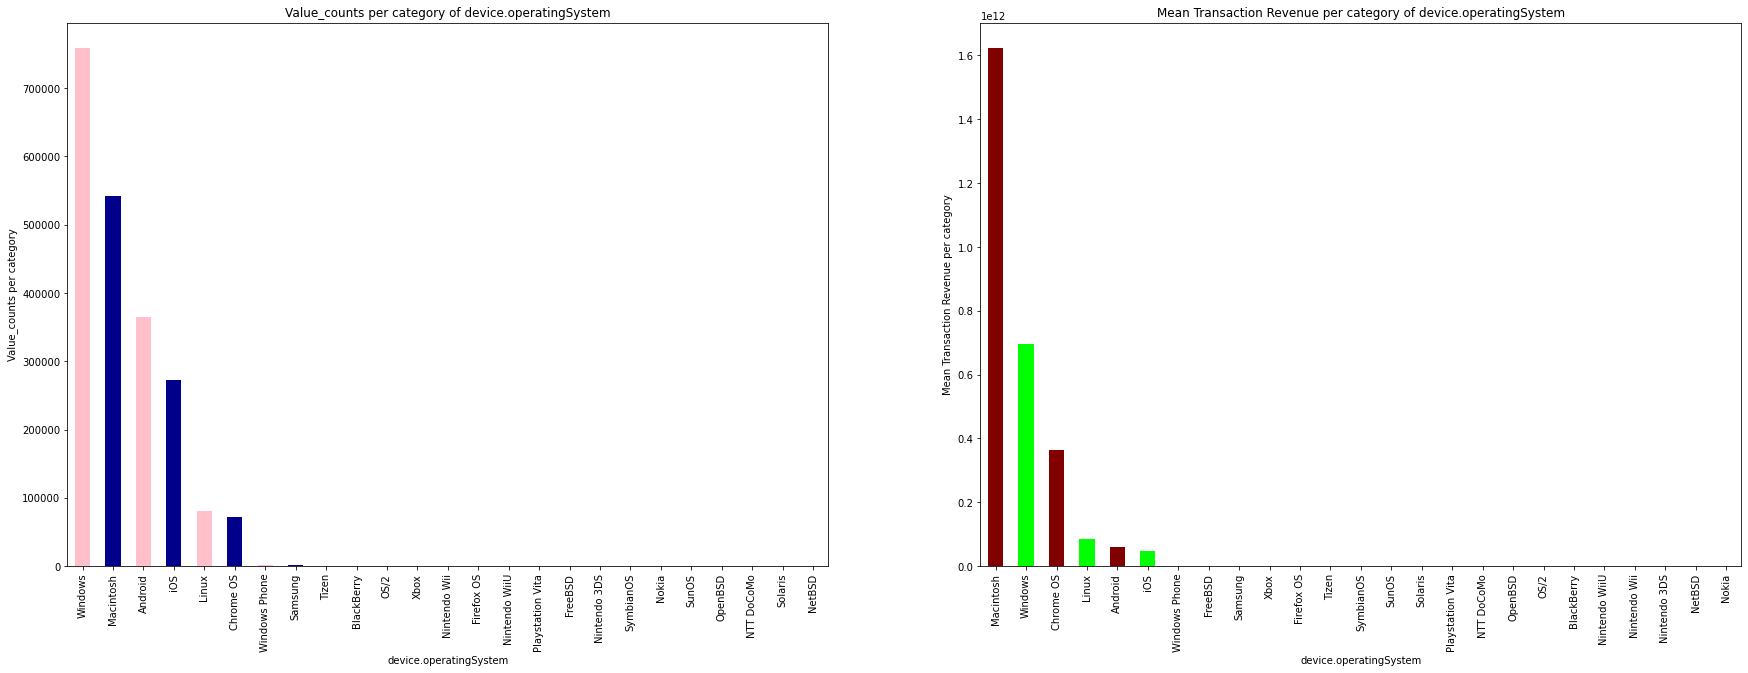

In [7]:
feature_plot("device.operatingSystem",df)

In [33]:
device_opeartingsystem_transaction_revenue_sum=df.groupby("device.operatingSystem")["totals.transactionRevenue"].sum().sort_values(ascending=False)
device_opeartingsystem_transaction_revenue_sum_equal0=device_opeartingsystem_transaction_revenue_sum[device_opeartingsystem_transaction_revenue_sum==0]
df["device.operatingSystem"]=df["device.operatingSystem"].apply(lambda x:Zero_Revenue_category_separation(x,device_opeartingsystem_transaction_revenue_sum_equal0))

<AxesSubplot:>

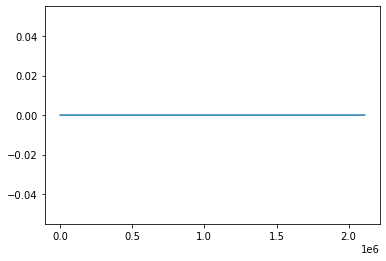

In [17]:
df[df["device.operatingSystem"].isnull()]["totals.transactionRevenue"].plot()

In [ ]:
# column device.operatingsystem having null values have null or 0 transactionRevenue so lets drop those rows
df=df.dropna(subset=["device.operatingSystem"])

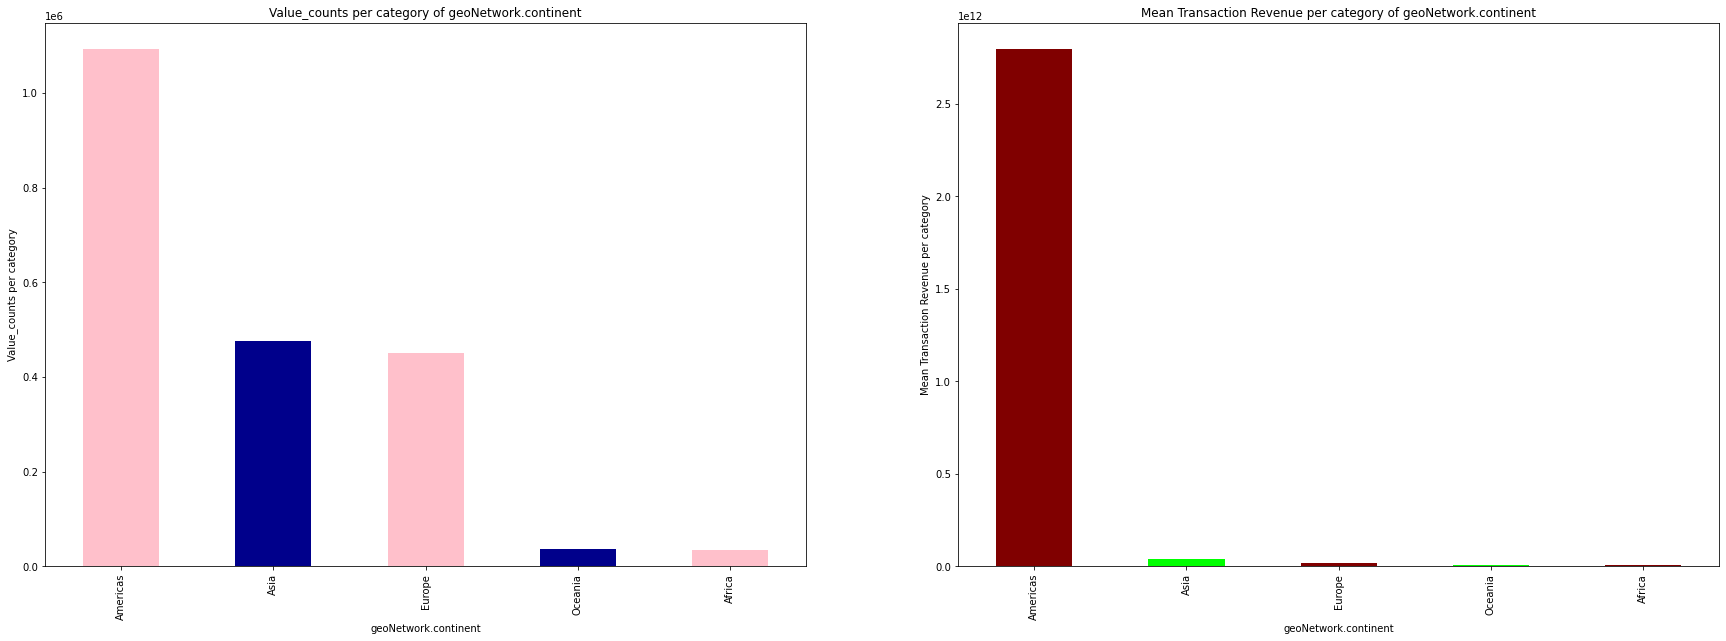

In [19]:
feature_plot("geoNetwork.continent",df)

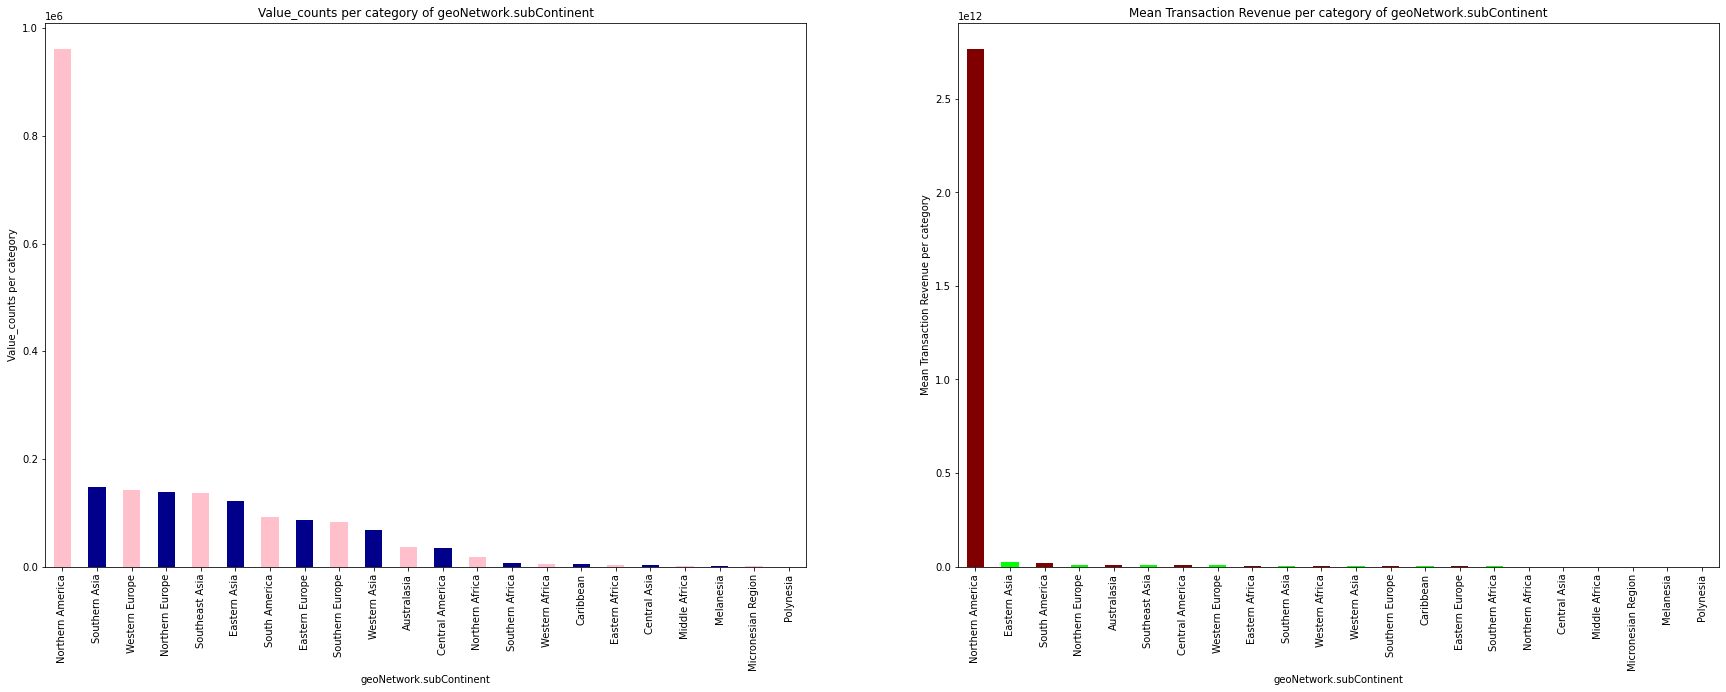

In [20]:
feature_plot("geoNetwork.subContinent",df)

#### There are no revenue generated by subContinent Middle Africa,Micronesian Region, Melanesia, Polynesia so we will drop the rows where there are theses subContinents.

In [40]:
subContinent_0_revenue_index=df[(df["geoNetwork.subContinent"]=="Middle Africa")|(df["geoNetwork.subContinent"]=="Micronesian Region")|(df["geoNetwork.subContinent"]=="Melanesia")|(df["geoNetwork.subContinent"]=="Polynesia")].index
df=df.drop(subContinent_0_revenue_index)
subContinenet_null_revenue0_index=df[(df["geoNetwork.subContinent"].isnull())&(df["totals.transactionRevenue"]==0)].index

#### Delete the rows where subContinent column is null and transactionRevenue is 0.

In [45]:
df=df.drop(subContinenet_null_revenue0_index)

<AxesSubplot:xlabel='count', ylabel='geoNetwork.country'>

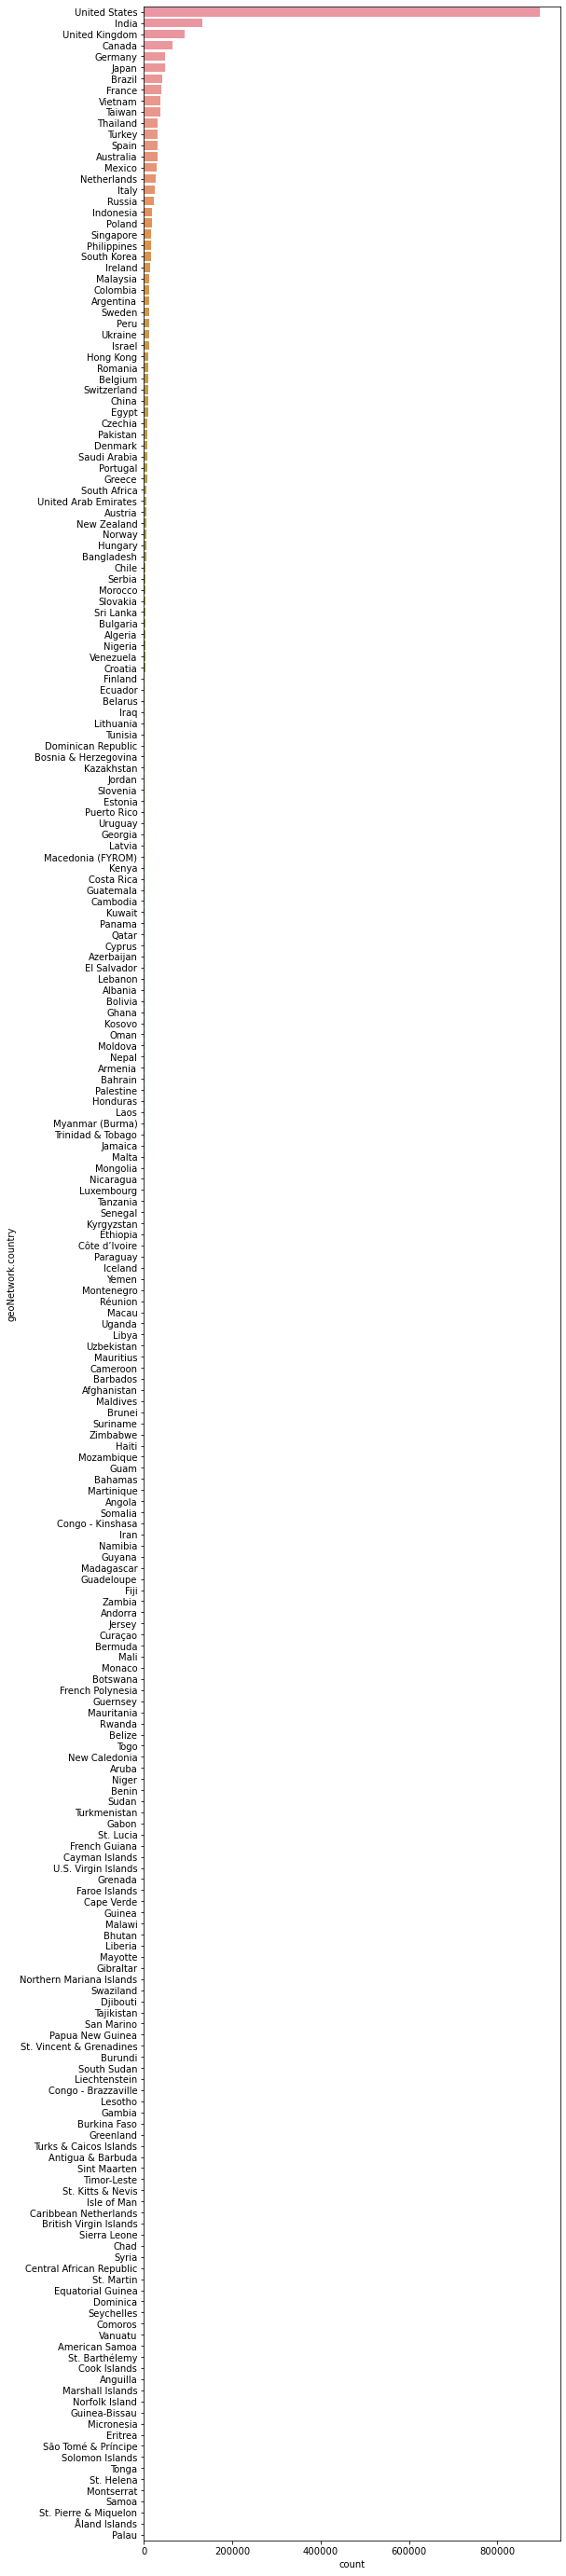

In [19]:
plt.figure(figsize=(8,50))
sns.countplot(data=df,y="geoNetwork.country",order=df["geoNetwork.country"].value_counts().index,orient="v")

<AxesSubplot:xlabel='geoNetwork.country'>

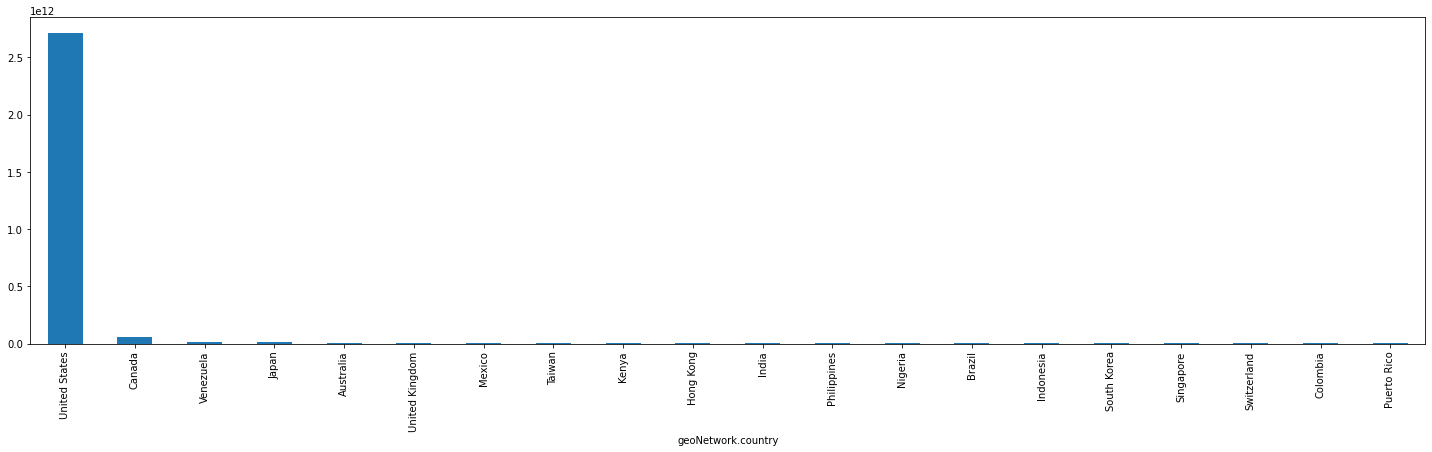

In [30]:
plt.figure(figsize=(25,6))
df.groupby("geoNetwork.country")["totals.transactionRevenue"].sum().sort_values(ascending=False)[:20].plot.bar()

In [46]:
country_totaltransaction_revenue=df.groupby("geoNetwork.country")["totals.transactionRevenue"].sum().sort_values(ascending=False)
country_totaltransaction_0revenue=country_totaltransaction_revenue[country_totaltransaction_revenue==0]
df["geoNetwork.country"]=df["geoNetwork.country"].apply(lambda x: Zero_Revenue_category_separation(x,country_totaltransaction_0revenue))